In [44]:
import sys
import os
# sys.path.append(os.path.abspath('/home/theo_ubuntu/Diplomatic_incident/HE/TenSEAL/My_HE_FHE/notebooks'))

from Plots import plot_clients_history, plot_time, plot_server_history

# old way to collect data

## Path

In [45]:
folder_path = "/home/theo_ubuntu/Diplomatic_incident/HE/TenSEAL/My_HE_FHE/outputs/2025-02-04/19-22-37"

## config

In [46]:
folder_hydra_config = ".hydra/config.yaml"
path = os.path.join(folder_path , folder_hydra_config )

import yaml

# Load YAML file
with open(path, "r") as file:
    config = yaml.safe_load(file)

## plot hystory 

In [47]:
import pickle

def load_pickle(filename="simulation_data.pkl"):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [48]:
file_name = "simulation_data.pkl"
path = os.path.join(folder_path , file_name )
data = load_pickle(path)
try:
    history = data['hystory']
except:
    history = data['history']

timestamps = data['timestamps']
emissions = data['emissions']

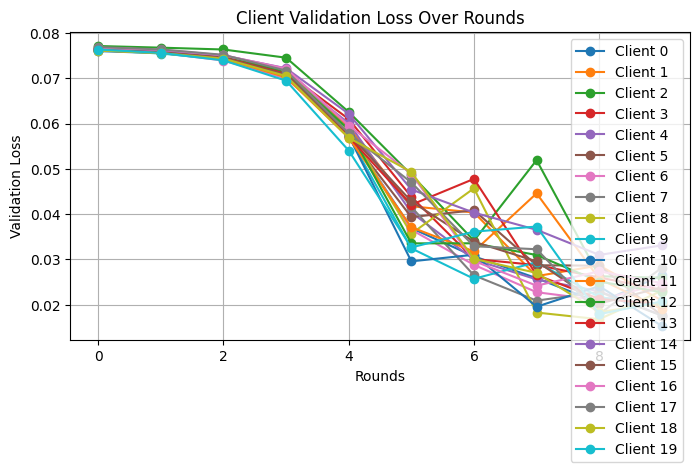

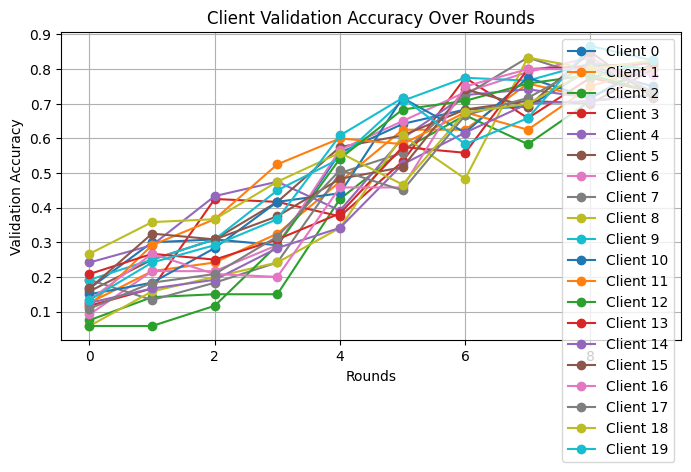

In [49]:
plot_clients_history(history, save=True, save_path = folder_path)

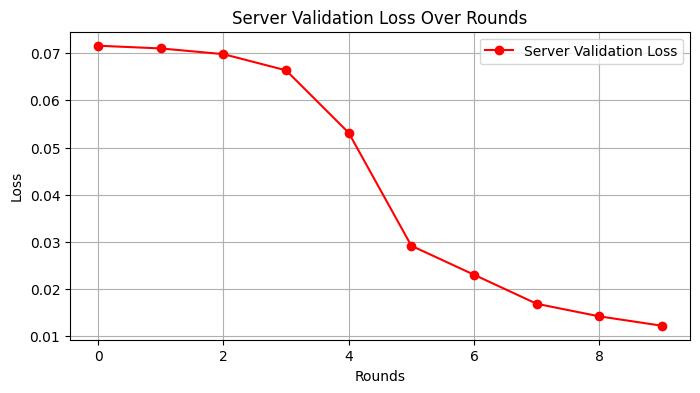

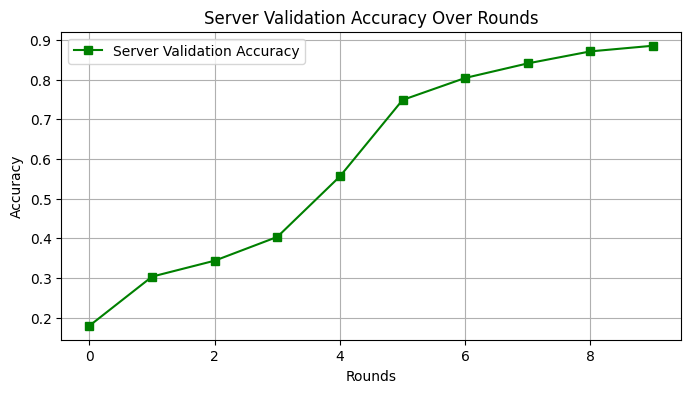

In [50]:
plot_server_history(history, save=True, save_path = folder_path)

## code carbon data 

In [52]:
import csv

def load_csv_as_dicts(file_path):
    """
    Load data from a CSV file into a list of dictionaries.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        list: A list of dictionaries where keys are column names 
              and values are parsed based on the content.
    """
    data = []
    with open(file_path, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            parsed_row = {}
            for key, value in row.items():
                # Attempt to parse each value into int, float, or leave as string
                try:
                    parsed_row[key] = int(value)
                except ValueError:
                    try:
                        parsed_row[key] = float(value)
                    except ValueError:
                        parsed_row[key] = value
            data.append(parsed_row)
            
    return data

In [53]:
file_name = "emissions.csv"
file_path = os.path.join(folder_path, file_name)
data = load_csv_as_dicts(file_path)
data

[{'timestamp': '2025-02-04T19:25:21',
  'project_name': 'codecarbon',
  'run_id': '15a12937-6159-49e3-a48a-2b52859044fb',
  'experiment_id': '5b0fa12a-3dd7-45bb-9766-cc326314d9f1',
  'duration': 159.5804734179983,
  'emissions': 0.0005265581451991934,
  'emissions_rate': 3.2996401998379176e-06,
  'cpu_power': 32.5,
  'gpu_power': 0.0,
  'ram_power': 2.7931437492370605,
  'cpu_energy': 0.001440655433000009,
  'gpu_energy': 0,
  'ram_energy': 0.00012380927668996538,
  'energy_consumed': 0.001564464709689974,
  'country_name': 'Greece',
  'country_iso_code': 'GRC',
  'region': 'central macedonia',
  'cloud_provider': '',
  'cloud_region': '',
  'os': 'Linux-5.15.133.1-microsoft-standard-WSL2-x86_64-with-glibc2.27',
  'python_version': '3.11.11',
  'codecarbon_version': '2.8.3',
  'cpu_count': 12,
  'cpu_model': 'AMD Ryzen 5 5600G with Radeon Graphics',
  'gpu_count': '',
  'gpu_model': '',
  'longitude': 22.9358,
  'latitude': 40.6439,
  'ram_total_size': 7.448383331298828,
  'tracking_mo

## important

In [54]:
config

{'SEED': 420,
 'BATCH_SIZE': 32,
 'num_clients': 20,
 'num_dataset_partitions': 100,
 'ROUNDS': 10,
 'local_epochs': 1,
 'model': 'Net_Mnist',
 'dataset': 'Mnist',
 'learning_rate': 0.01,
 'momentum': 0.9,
 'degree': 2048}

In [55]:
config['SEED']

420

In [56]:
config['num_clients']

20

In [74]:
history['Test_loss'][0]

0.015478636106848716

In [75]:
history['Test_acc'][0]

0.8544

In [59]:
data[0]['emissions']

0.0005265581451991934

In [60]:
data[0]['duration']

159.5804734179983

In [61]:
average_client_time = sum(timestamps["client"])/ len(timestamps["client"])
average_client_time

2.8761462926864625

In [62]:
average_server_time = sum(timestamps["server"])/ len(timestamps["server"])
average_server_time

5.6906431913375854

# FINAL Results_extractor

In [ ]:
import os
import yaml
import pandas as pd

# Define base directory
Saved_outputs_path = "/home/theo_ubuntu/Diplomatic_incident/HE/TenSEAL/testing_CKKS/My_fl_tests/Saved_outputs"

base_path = os.path.join(Saved_outputs_path, "Mnist_myBachFL/2048")

def Results_extractor(base_path):
    # Initialize a list to store results
    results = []
    # Loop through each folder in the directory
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)

        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory

        print(f"\n📂 Accessing folder: {folder_path}")

        # Iterate over files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            print(f"   📄 Found file: {file_path}")

            # Load Hydra configuration
            config_path = os.path.join(file_path, ".hydra/config.yaml")
            try:
                with open(config_path, "r") as file:
                    config = yaml.safe_load(file)
            except FileNotFoundError:
                print("   ⚠️ Config file not found.")
                continue

            # Load simulation data
            data_path = os.path.join(file_path, "simulation_data.pkl")
            data = load_pickle(data_path)
            history = data['history']
            timestamps = data['timestamps']
            emissions = data['emissions']

            # # # Generate and save plots
            # plot_clients_history(history, save=True, save_path=file_path)
            # plot_server_history(history, save=True, save_path=file_path)

            # Load emissions data
            emissions_path = os.path.join(file_path, "emissions.csv")
            emissions_data = load_csv_as_dicts(emissions_path)

            # Compute average computation times
            avg_client_time = sum(timestamps["client"]) / len(timestamps["client"])
            avg_server_time = sum(timestamps["server"]) / len(timestamps["server"])

            # Print formatted results
            print("\n📊 Experiment Summary")
            print(f"   🔹 SEED: {config['SEED']}")
            print(f"   🔹 degree: {config['degree']}")
            print(f"   🔹 Number of Clients: {config['num_clients']}")
            print(f"   🔹 Test Loss: {history['Test_loss'][0]:.5f}")
            print(f"   🔹 Test Accuracy: {history['Test_acc'][0]:.5f}")
            print(f"   🔹 Emissions: {emissions_data[0]['emissions']} kgCO₂")
            print(f"   🔹 Duration: {emissions_data[0]['duration']} seconds")
            print(f"   🔹 Avg. Client Time: {avg_client_time:.3f} sec")
            print(f"   🔹 Avg. Server Time: {avg_server_time:.3f} sec\n")

            # Store results in a list for later saving
            results.append({
                "SEED": config['SEED'],
                "degree": config['degree'],
                "Num Clients": config['num_clients'],
                "Test Loss": history['Test_loss'][0],
                "Test Accuracy": history['Test_acc'][0],
                "Emissions (kgCO₂)": emissions_data[0]['emissions'],
                "Duration (s)": emissions_data[0]['duration'],
                "Avg Client Time (s)": avg_client_time,
                "Avg Server Time (s)": avg_server_time
            })

    # Convert the results list to a DataFrame and save to Excel
    df = pd.DataFrame(results)
    excel_path = os.path.join(base_path, "experiment_results.xlsx")
    df.to_excel(excel_path, index=False)

    print(f"✅ All experiments processed! Results saved to: {excel_path}")


In [ ]:
Saved_outputs_path = "/home/theo_ubuntu/Diplomatic_incident/HE/TenSEAL/testing_CKKS/My_fl_tests/Saved_outputs"

base_path = os.path.join(Saved_outputs_path, "Mnist_myBachFL/32768")

Results_extractor(base_path)